Concrete Strength Prediction Using Neural Networks

- Importa el csv desde drive
- Analiza los datos
- add the new feature to the dataframe
I want to add another feature to this dataset. The feauture is the ratio of water to cement and it is often used by engineers to estimate concrete strength. I'll call this feature 'WC Ratio'
concrete_data['Water']/concrete_data['Cement']
- ¿Cuántas filas y columnas tiene?
- ¿Falta algún dato?
# check out the descriptive statistics of the dataset
# visualize the distribution of the features
Use the Keras library to build a neural network with the following:

One hidden layer with 10 nodes, and a ReLU activation function
Use the ADAM optimizer and the mean squared error as the loss function

Ahora normaliza los datos y haz de nuevo la red
#normalize the predictor variables by subtracting the mean and dividing by standard deviation

Aumento el número de capas

dibuja como mejora la perdida




https://github.com/mikeg5/concrete-strength-prediction-keras-NN/blob/master/concrete-strength-prediction-NN.ipynb

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Importar el csv
data = pd.read_csv('data.csv')

In [3]:
# Analizar los datos
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
# Añadir una nueva característica al dataframe. 
# La característica es el ratio del agua al cemento y suele ser usada por los ingenieros para estimar la fuerza del cemento.
# Llamará a esta característica 'WC Ratio'

data['WC Ratio'] = data['Water']/data['Cement']

## ¿Cuántas filas y columnas tiene?

In [5]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,WC Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,1.103708


1030 filas y 10 columnas

### ¿Falta algún dato?

In [6]:
data.isnull().any()

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
Strength              False
WC Ratio              False
dtype: bool

No

In [7]:
# Comprobar las estadísticas descriptivas del conjunto de datos
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,WC Ratio
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748266
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314005
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266893
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533333
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675349
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935165
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882353


<Axes: ylabel='Count'>

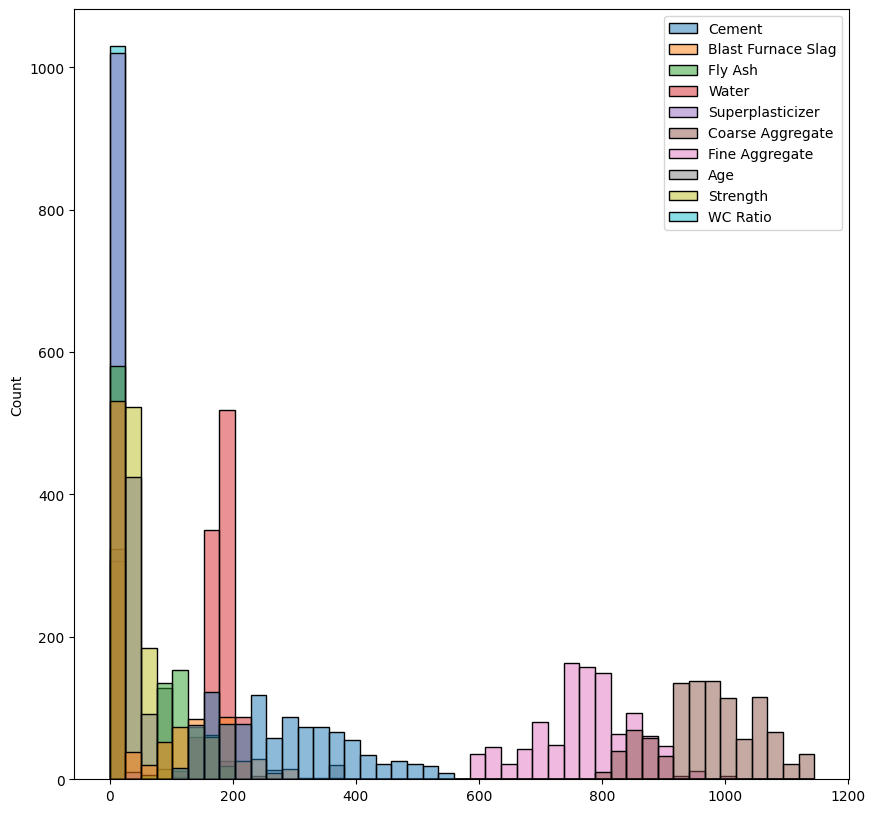

In [8]:
# Visualizar la distribución de las características
plt.figure(figsize = (10, 10))
sns.histplot(data)

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

In [10]:
# Utilizar la librería Keras para construir una red neuronal con lo siguientes:
#  Una capa oculta con 10 nodos, y una función de activación ReLU
#  Utilice el optimizador ADAM y el error cuadrático medio como función de pérdida

model = keras.models.Sequential([
    keras.layers.Dense(10, activation = 'relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])


In [11]:
history_reg = model.fit(X_train, y_train,epochs = 500)

Epoch 1/500


13/13 [==============================] - 1s 2ms/step - loss: 60771.7812 - mse: 60771.7812 - mae: 241.1417
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 46249.6367 - mse: 46249.6367 - mae: 209.3317
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 34767.7773 - mse: 34767.7773 - mae: 180.5948
Epoch 4/500
13/13 [==============================] - 0s 952us/step - loss: 26006.0801 - mse: 26006.0801 - mae: 155.2637
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 19401.1895 - mse: 19401.1895 - mae: 133.1544
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 14511.5244 - mse: 14511.5244 - mae: 114.3768
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 10863.4395 - mse: 10863.4395 - mae: 98.0556
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 8092.0972 - mse: 8092.0972 - mae: 83.7404
Epoch 9/500
13/13 [==============================] - 0s 

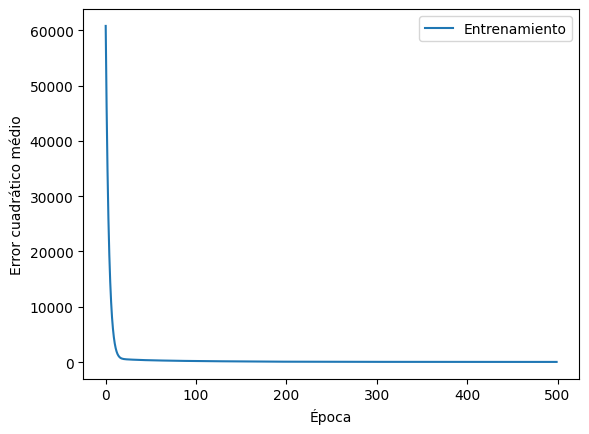

In [12]:
def plot_history():
    plt.plot(history_reg.history['mse'], label="Entrenamiento")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

In [13]:
history_reg.history

{'loss': [60771.78125,
  46249.63671875,
  34767.77734375,
  26006.080078125,
  19401.189453125,
  14511.5244140625,
  10863.439453125,
  8092.09716796875,
  6065.00537109375,
  4530.88818359375,
  3398.178955078125,
  2552.338134765625,
  1940.741943359375,
  1494.566650390625,
  1185.76171875,
  967.7027587890625,
  811.4659423828125,
  710.873779296875,
  641.5132446289062,
  597.2857055664062,
  561.4146118164062,
  539.2570190429688,
  522.5591430664062,
  509.14453125,
  497.60205078125,
  487.7890319824219,
  478.67462158203125,
  470.82208251953125,
  461.81451416015625,
  454.5960693359375,
  446.8575439453125,
  439.4883117675781,
  432.2421875,
  425.6662292480469,
  418.82208251953125,
  412.6369934082031,
  406.6629333496094,
  400.22100830078125,
  394.52294921875,
  388.7994689941406,
  383.3770751953125,
  378.0304870605469,
  372.8814697265625,
  367.7910461425781,
  363.340087890625,
  358.51434326171875,
  354.3089904785156,
  349.6861877441406,
  345.9010925292969,


In [14]:
# Finalmente, evaluamos como se comporta el modelo en el conjunto de datos de test
loss, mae, mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print('Error cuadrático medio en test: ', mse)
print('Raiz del error cuadrático medio en test: ', rmse)

4/4 [==============================] - 0s 6ms/step - loss: 51.0610 - mse: 51.0610 - mae: 5.4466
Error cuadrático medio en test:  5.446637153625488
Raiz del error cuadrático medio en test:  2.3338031522871607
